<a href="https://colab.research.google.com/github/waelrash1/time_series_forecasting_dt302-2/blob/main/ACF_and_PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicised text*# ACF and PACF

## Moving Average MA(q)

$$ X_t = Z_t + \theta_1 Z_{t-1} $$

Using the backshift operator, the model MA(1) can be written in this form: 

$$ X_t = \Theta(B)Z_t $$

Where $$  \Theta(B)= (1+ \theta_1B)$$

### Simulation of MA

In [ ]:
# MA(1)
coef=c(.5)

In [ ]:
#set.seed(1)
x.ts= arima.sim(list(ma=coef),n=10000)

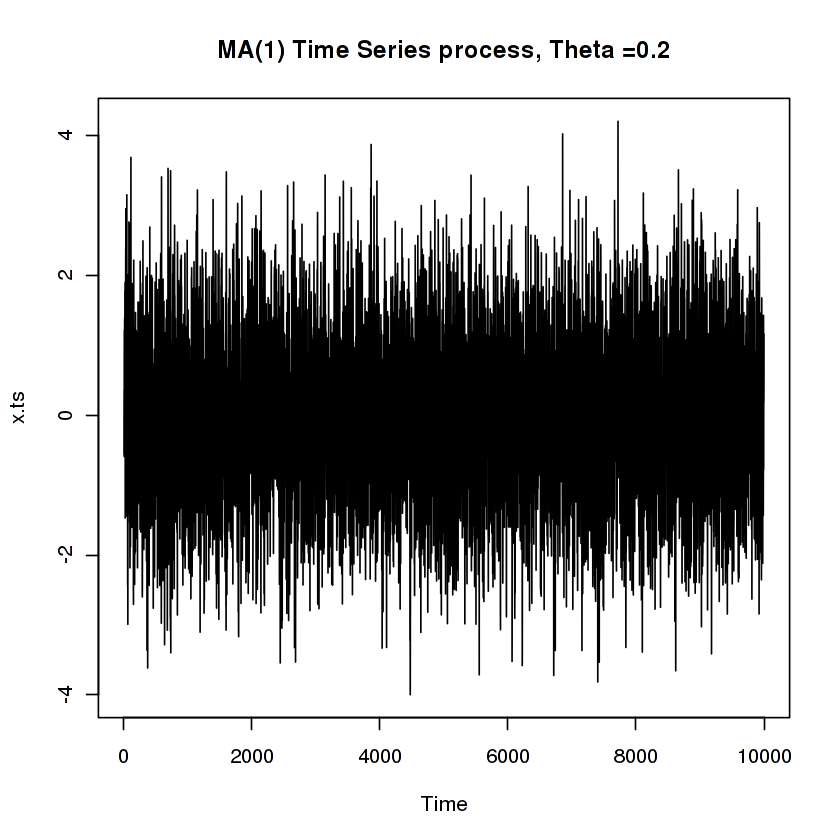

In [ ]:
plot(x.ts, main='MA(1) Time Series process, Theta =0.2')

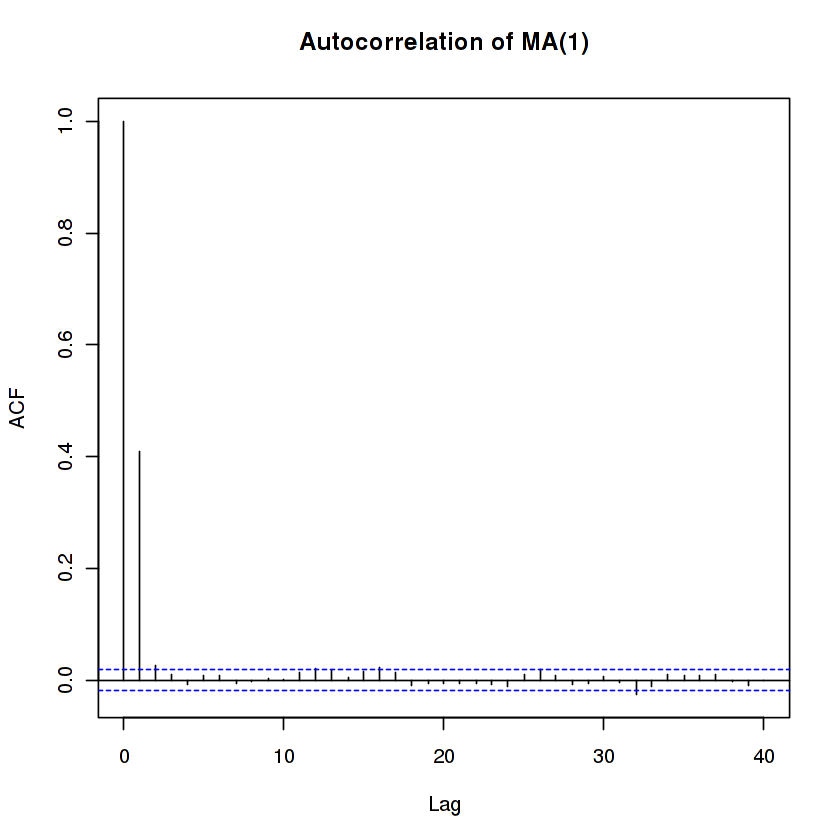

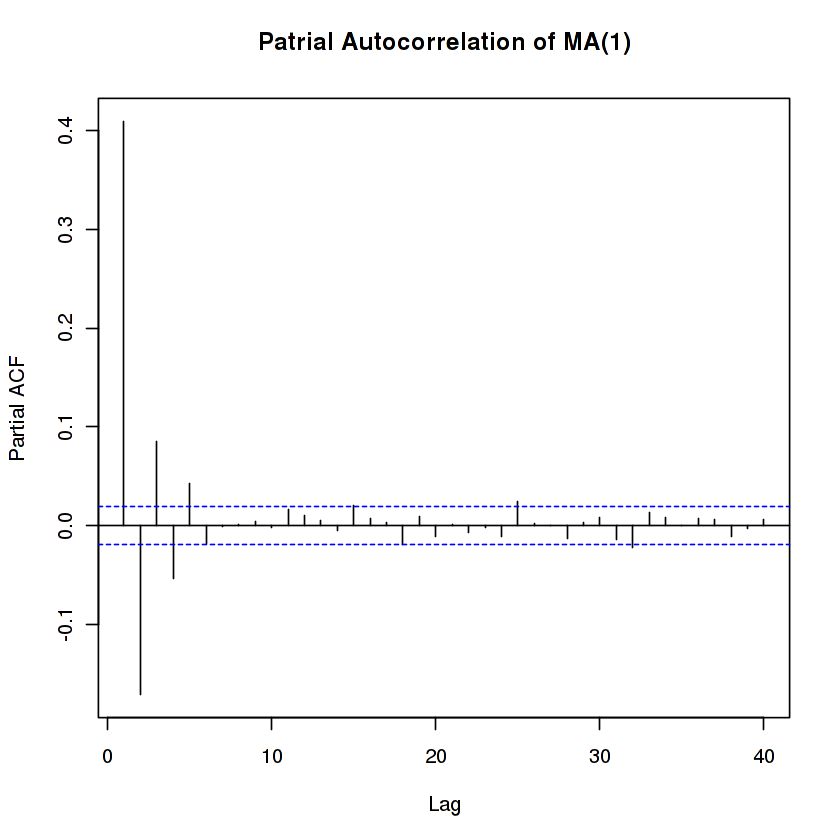

In [ ]:
acf(x.ts, type='correlation', main='Autocorrelation of MA(1)')
acf(x.ts, type='partial', main='Patrial Autocorrelation of MA(1)')

## Simulate MA(q) for various values

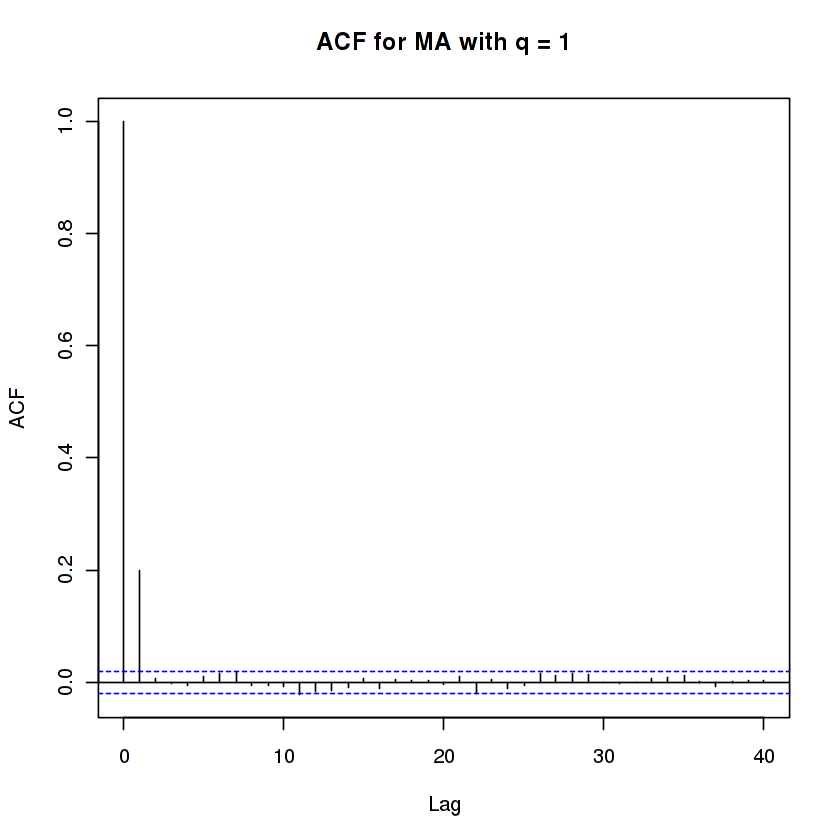

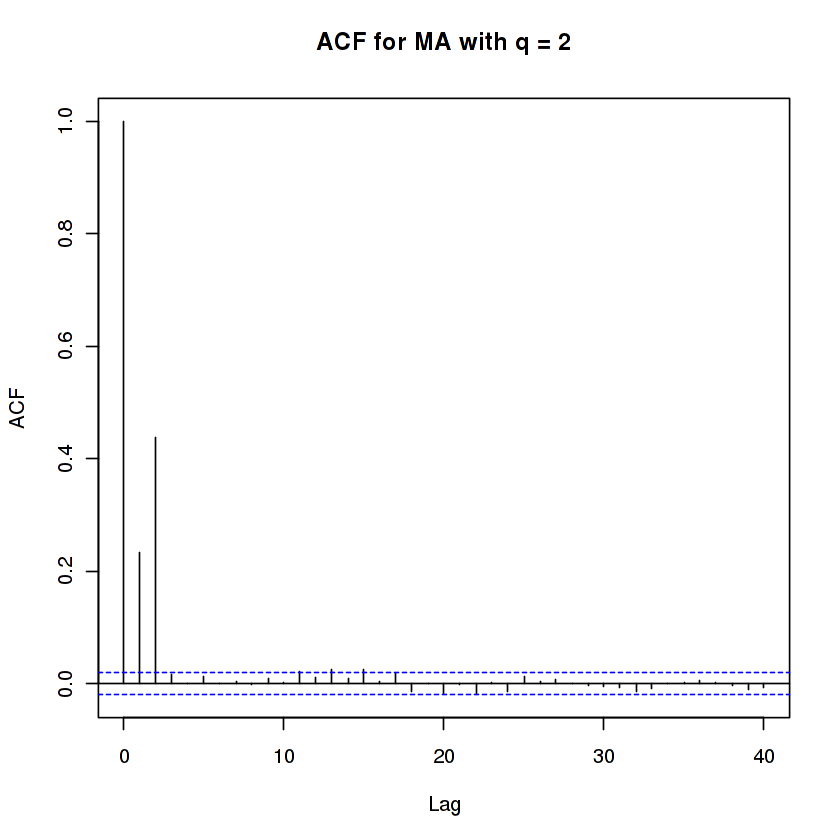

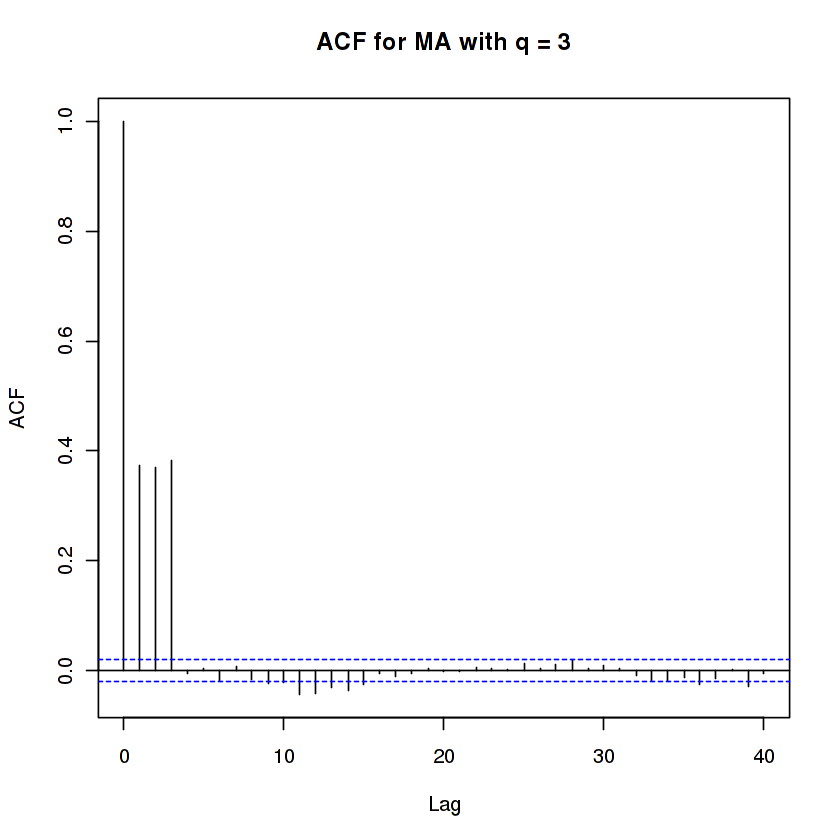

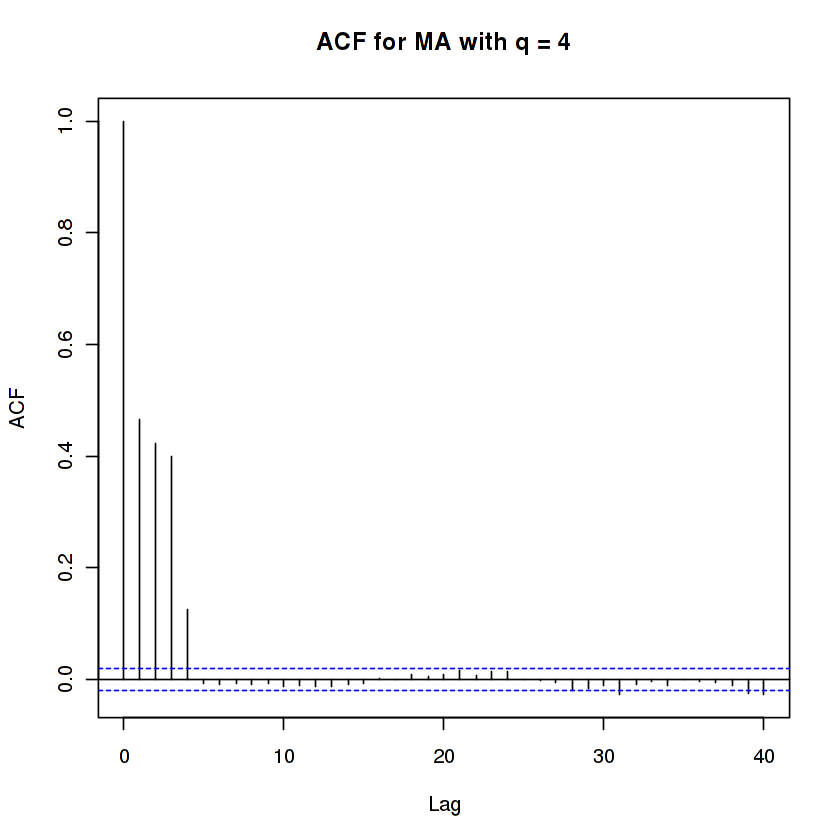

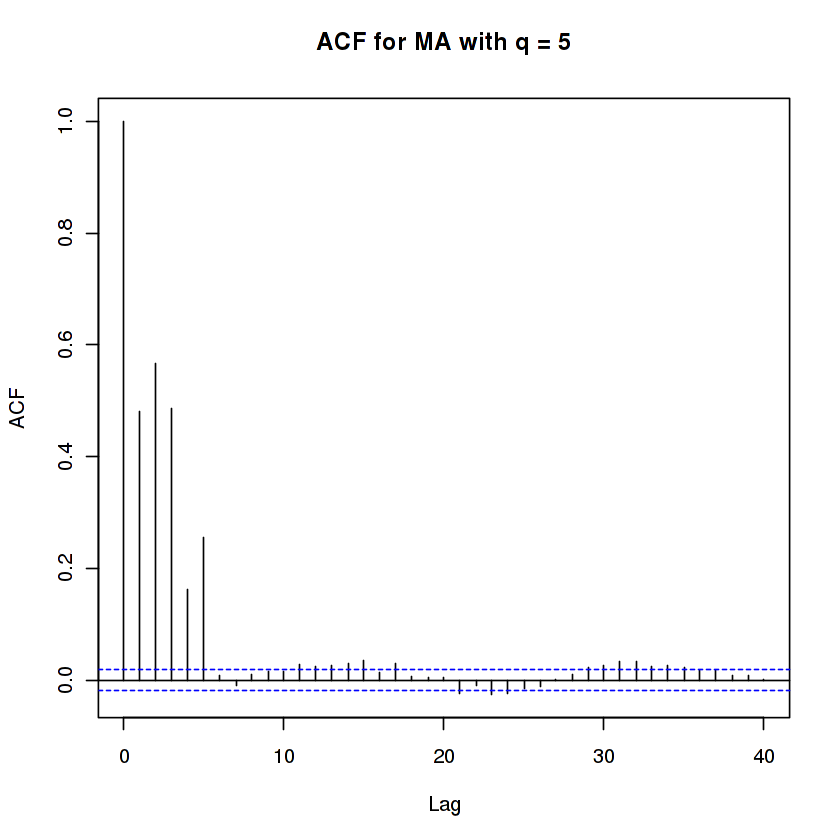

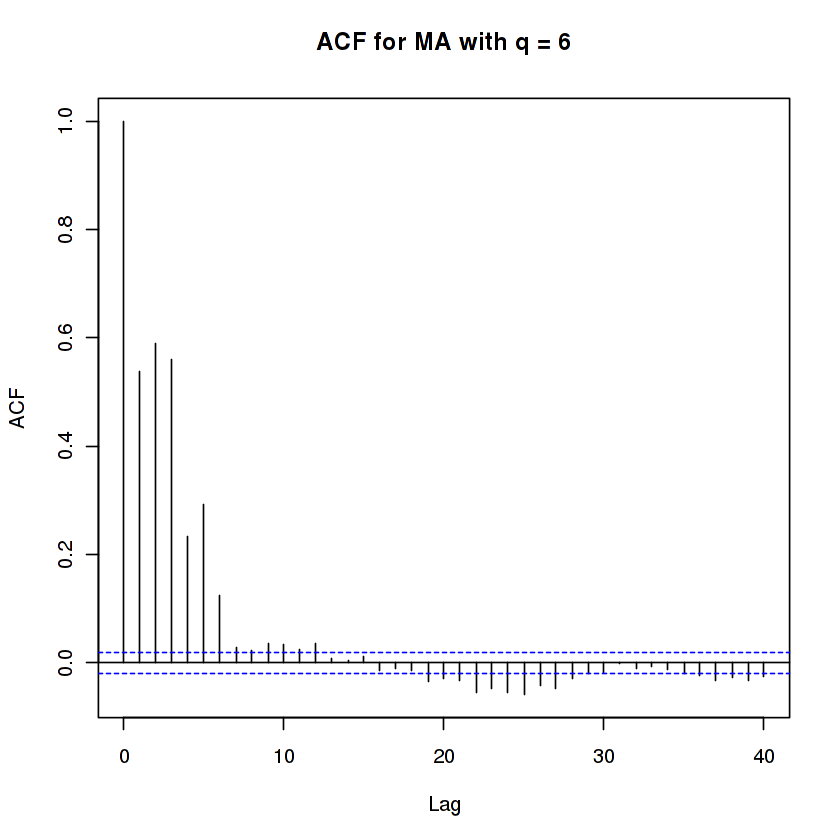

In [ ]:
set.seed(10)
coef= c(.2,.6,.8,.3,.7,.3)

for(i in 1: length(coef))
    {
    
    x.ts <- arima.sim(list(ma= coef[1:i]), n=10000)
    acf=acf(x.ts, main=paste('ACF for MA with q =', i))
}

> A Pure Moving average of order q has an ACF that cuts-off after q lags.

# Simulation of AR process

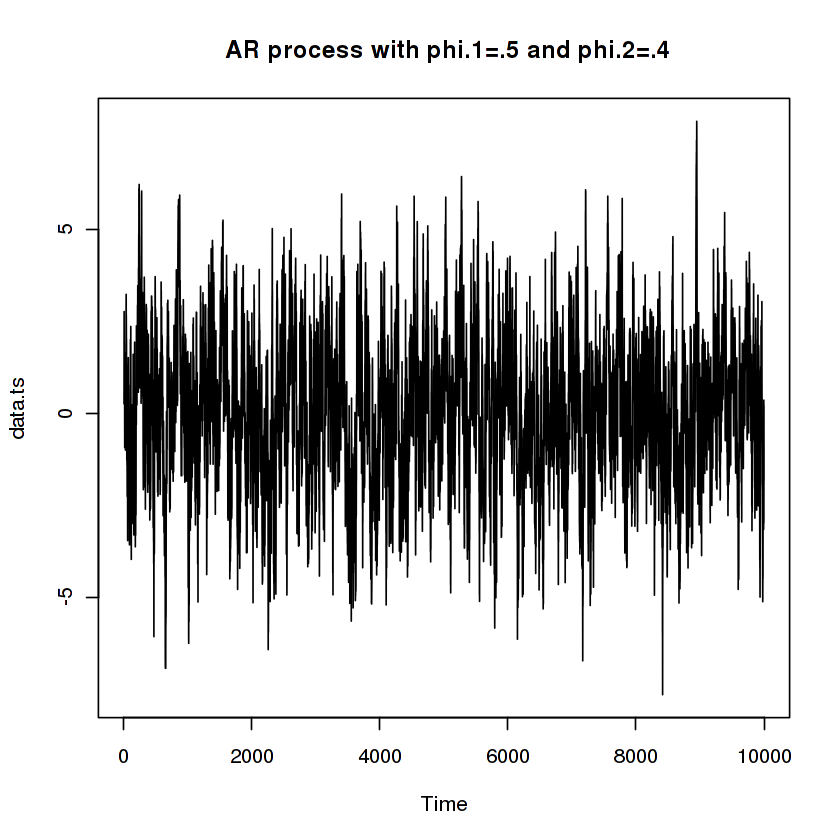

In [ ]:
set.seed(10)
phi.1=.5
phi.2=.4
data.ts= arima.sim(list(ar = c(phi.1,phi.2)), n=10000)
plot(data.ts, main=' AR process with phi.1=.5 and phi.2=.4')

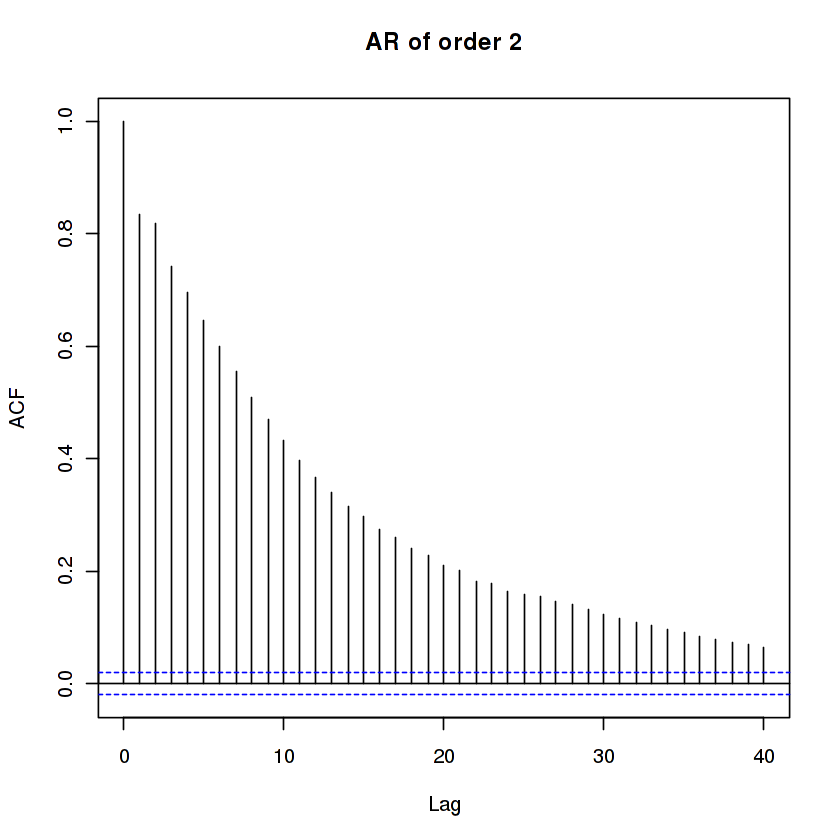

In [ ]:
acf(data.ts, main="AR of order 2")

## Partial Autocorrelation PACF

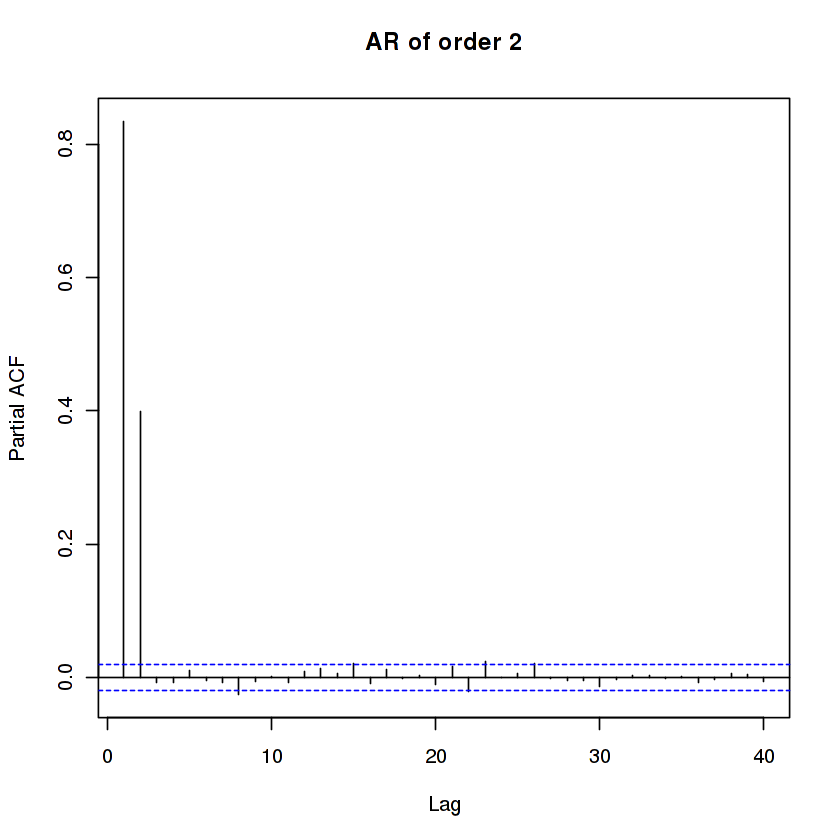

In [ ]:
acf(data.ts, type='partial', main="AR of order 2")